<center style="font-size: 2em; font-weight: bold;"> Microeconometria Aplicada II </center>
<center style="font-size: 2em; font-weight: bold;"> Tema 3 </center>
<left style="font-size: 4em; font-weight: bold;"> Autor: Edinson Tolentino </left>

In [1]:
# librerias para manipulacion de datos
import pandas # manipulacion de datos 
import os # sistema operativo
import numpy # manipulacion de variables
import sympy # operacion math

# Librerias de Graficos
import seaborn
import matplotlib.pyplot as plt

# librerias de distribucion estadistica
from scipy.stats import norm # distribucion normal


# Carga de datos

In [2]:
# Ruta de carpeta
ruta = 'D:/Dropbox/Docencia/UPN/Estadistica/S13/Data'


In [3]:
data = pandas.read_csv(os.path.join(ruta,"E0.csv"))

In [4]:
#data = pandas.read_csv("E0.csv")

In [5]:
data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


# Descripccion de variables

La descripccion de variables se encuentran en la siguiente pagina

https://www.football-data.co.uk/englandm.php

Aqui algunas variables principales:

- Attendance = Crowd Attendance
- FTHG and HG = Full Time Home Team Goals
- FTAG and AG = Full Time Away Team Goals
- HS = Home Team Shots
- AS = Away Team Shots
- Referee = Match Referee
- HO = Home Team Offsides
- AO = Away Team Offsides
- HY = Home Team Yellow Cards
- AY = Away Team Yellow Cards

In [6]:
# Observo cuantas filas y columna tiene la data
data.shape

(380, 106)

In [7]:
# Mostrar los primeros cinco datos
data.head().T

,0,1,2,3,4
Div,E0,E0,E0,E0,E0
Date,13/08/2021,14/08/2021,14/08/2021,14/08/2021,14/08/2021
Time,20:00,12:30,15:00,15:00,15:00
HomeTeam,Brentford,Man United,Burnley,Chelsea,Everton
AwayTeam,Arsenal,Leeds,Brighton,Crystal Palace,Southampton
...,...,...,...,...,...
PCAHA,2.13,1.77,2.14,1.81,1.88
MaxCAHH,2.05,2.19,1.82,2.16,2.08
MaxCAHA,2.17,1.93,2.19,1.93,1.9
AvgCAHH,1.8,2.1,1.79,2.06,2.03


# Variables

## Descripccion de la variable principal

In [8]:
# Cantidad de goles al final del partido del local
data['FTHG'].value_counts()

1    121
0     93
2     89
3     50
4     15
5      8
7      2
6      2
Name: FTHG, dtype: int64

In [9]:
# Cantidad de goles al final del partido del local (porcentaje)
data['FTHG'].value_counts(normalize =True)

1    0.318421
0    0.244737
2    0.234211
3    0.131579
4    0.039474
5    0.021053
7    0.005263
6    0.005263
Name: FTHG, dtype: float64

<AxesSubplot: xlabel='FTHG', ylabel='Count'>

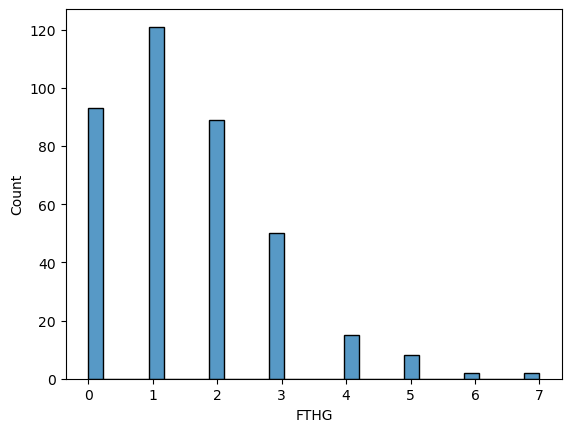

In [10]:
# Grafico de histograma
seaborn.histplot(data, x='FTHG', bins=30)

<AxesSubplot: ylabel='FTHG'>

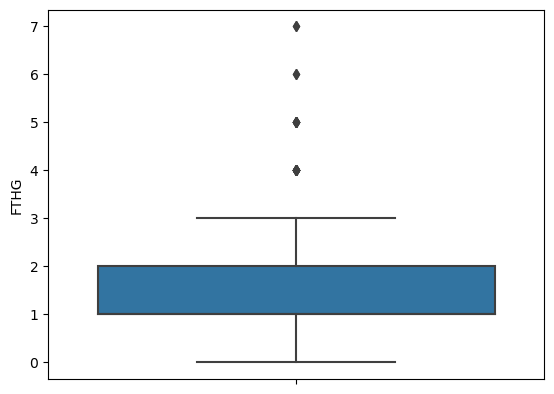

In [11]:
# Grafico de Caja
seaborn.boxplot(data, y='FTHG')

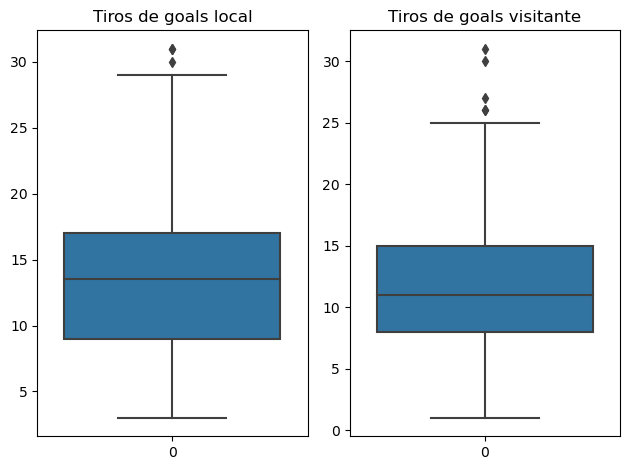

In [12]:
# Histogramas de shots de goles de visitante (away ) vs local (home)
import matplotlib.pyplot as plt
#seaborn.histplot(data, x='HS', bins=10)
#seaborn.boxplot(data, y=['HS','AS'])

# Crear los gráficos de caja
plt.subplot(1, 2, 1)  # Primer gráfico de caja
seaborn.boxplot(data=data['HS'])
plt.title('Tiros de goals local')

plt.subplot(1, 2, 2)  # Segundo gráfico de caja
seaborn.boxplot(data=data['AS'])
plt.title('Tiros de goals visitante')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

## Analisis de goles y equipo

In [13]:
# ¿Quienes son esos outliers?
cuantil = data['FTHG'].quantile(0.95)
data_outliers = data[data['FTHG'] > cuantil]

print()
print("Quienes son los quipos con mas goles (mayor de 95 %)")
print()
print(data_outliers['HomeTeam'].unique())



Quienes son los quipos con mas goles (mayor de 95 %)

['Man United' 'Man City' 'Chelsea' 'Liverpool' 'Tottenham' 'Arsenal']


In [14]:
# Variables que analizaremos (filtro de variables)
base_variables = ['FTHG','HS','AS','HY']

In [15]:
# Calculo del promedio 
data[base_variables].describe()

,FTHG,HS,AS,HY
count,380.000000,380.000000,380.000000,380.000000
mean,1.513158,13.847368,11.736842,1.652632
std,1.326545,5.661784,5.348460,1.258373
min,0.000000,3.000000,1.000000,0.000000
25%,1.000000,9.000000,8.000000,1.000000
50%,1.000000,13.500000,11.000000,1.500000
75%,2.000000,17.000000,15.000000,2.000000
max,7.000000,31.000000,31.000000,6.000000


In [16]:
# Calculo del promedio 
data['FTHG'].mean()

1.513157894736842

## Analisis de correlacion

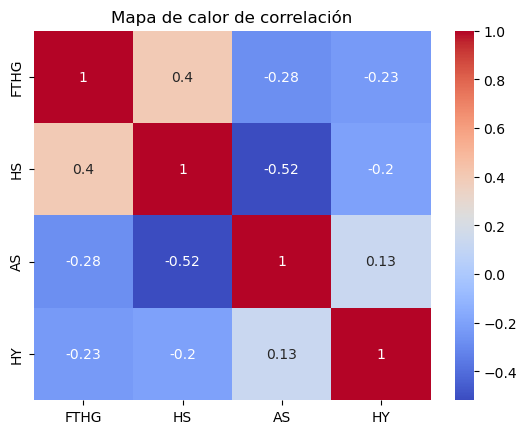

In [17]:
# Correlacion (mapa)
# Calcular la matriz de correlación
correlation_matrix = data[base_variables].corr()

# Crear el mapa de calor de correlación
seaborn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.title('Mapa de calor de correlación')
plt.show()



In [18]:
# Método paramétrico, es decir, X y Y tienen una distribución normal
r = data[base_variables].corr(method='pearson').round(3) 
r

,FTHG,HS,AS,HY
FTHG,1.000,0.399,-0.279,-0.231
HS,0.399,1.000,-0.518,-0.203
AS,-0.279,-0.518,1.000,0.131
HY,-0.231,-0.203,0.131,1.000


In [19]:
# No paramétrico
Rho =  data[base_variables].corr(method='spearman').round(3)
Rho

,FTHG,HS,AS,HY
FTHG,1.000,0.391,-0.250,-0.209
HS,0.391,1.000,-0.525,-0.202
AS,-0.250,-0.525,1.000,0.137
HY,-0.209,-0.202,0.137,1.000


# Modelo 

In [20]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
data_modelo = data[base_variables]
data_modelo.head().T

,0,1,2,3,4
FTHG,2,5,1,3,3
HS,8,16,14,13,14
AS,22,10,14,4,6
HY,0,1,2,0,2


## Modelo Poisson

In [22]:
poisson_model = smf.glm(formula ="FTHG ~ HS + AS + HY", data=data_modelo, family= sm.families.Poisson()).fit()

In [23]:
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   FTHG   No. Observations:                  380
Model:                            GLM   Df Residuals:                      376
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -563.81
Date:                Sat, 17 Jun 2023   Deviance:                       411.65
Time:                        13:50:53   Pearson chi2:                     344.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1919
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1500      0.217      0.692      0.4

In [24]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm

In [25]:
# Separamos la informacion de variuable dependiente
y = data_modelo['FTHG']
# Variables indepdendiente
X = data_modelo[['HS', 'AS', 'HY']]
# Se agrega la constante
X = sm.add_constant(X)


In [26]:
# Realiza predicciones utilizando el modelo ajustado
poisson_model_v2 = sm.GLM(y, X, family=sm.families.Poisson()).fit()

In [27]:
print(poisson_model_v2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   FTHG   No. Observations:                  380
Model:                            GLM   Df Residuals:                      376
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -563.81
Date:                Sat, 17 Jun 2023   Deviance:                       411.65
Time:                        13:50:53   Pearson chi2:                     344.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1919
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1500      0.217      0.692      0.4

## Modelo Binomial Negativa

In [28]:
# Realiza predicciones utilizando el modelo ajustado
binomial_model_v1 = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

C:\Users\edinson\.conda\envs\python_3_10\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [29]:
print(binomial_model_v1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   FTHG   No. Observations:                  380
Model:                            GLM   Df Residuals:                      376
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -625.12
Date:                Sat, 17 Jun 2023   Deviance:                       208.08
Time:                        13:50:53   Pearson chi2:                     142.
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08454
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0276      0.348     -0.079      0.9